In [9]:
import os
import pandas as pd


data = pd.read_csv("../../data/data.csv")



In [10]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


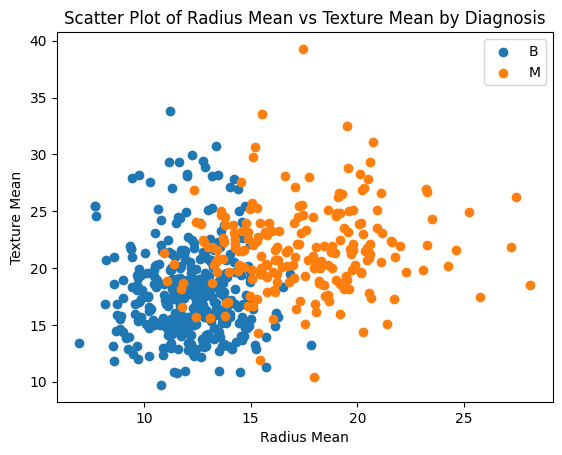

In [11]:
import matplotlib.pyplot as plt

# Plotting different groups with different colors
for label, group in data.groupby('diagnosis'):
    plt.scatter(group['radius_mean'], group['texture_mean'], label=label)

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Scatter Plot of Radius Mean vs Texture Mean by Diagnosis')
plt.legend()
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data[['radius_mean', 'texture_mean']], data['diagnosis'])

# Creating new instances for prediction (supresses warning)
new_instances = pd.DataFrame({
    'radius_mean': [10, 40, 60],
    'texture_mean': [20, 50,60]
})
# Predicting classes for the given instances
predictions = knn.predict(new_instances)
predictions

array(['B', 'M', 'M'], dtype=object)

# Manual Approach
The method should be done 'manually', but this would need 290,142 mathematic operations, taking up to 600 days of work. Therefore I used AI to develop a manual approach, that may help in understanding the algorithm better.

In [21]:
import numpy as np

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

def k_nn_manual(X_train, y_train, query_point, k=1):
    """A simple k-NN algorithm implementation."""
    distances = []
    # Calculate distance from query point to all other points
    for idx, train_point in X_train.iterrows():
        distance = euclidean_distance(query_point, [train_point['radius_mean'], train_point['texture_mean']])
        distances.append((distance, idx))
    
    # Sort distances and select the nearest k neighbors
    distances.sort()
    neighbors = distances[:k]
    
    # Collect the classes of these nearest neighbors
    classes = [y_train.iloc[neighbor[1]] for neighbor in neighbors]
    
    # Return the most common class among nearest neighbors
    return max(set(classes), key=classes.count)

# Sample Training Data
X_train_sample = data[['radius_mean', 'texture_mean']].iloc[:100]  # assuming a smaller subset for simplicity
y_train_sample = data['diagnosis'].iloc[:100]

# Query Points
query_points = [(10, 20), (40, 50), (60, 60)]

# Classify each query point
predictions = [k_nn_manual(X_train_sample, y_train_sample, query) for query in query_points]
predictions

['B', 'M', 'M']

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Activation



# Data preparation
X = data[['radius_mean', 'texture_mean']].values
y = data['diagnosis'].values
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
print(encoded_Y) # check if encoding successful



# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

'''
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))  

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
'''

model = Sequential()
model.add(Dense(10, input_dim=2, activation='linear'))  
model.add(Dense(1, activation='linear'))  

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


# Fit the model
model.fit(X_scaled, encoded_Y, epochs=100, batch_size=10, verbose=0)

# Predicting classes for the new instances with scaled input
new_instances_scaled = scaler.transform(new_instances)
predictions = model.predict(new_instances_scaled)
predicted_classes = (predictions > 0.5).astype(int)
predicted_labels = encoder.inverse_transform(predicted_classes.flatten())

predicted_labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

array(['B', 'M', 'M'], dtype=object)

# Manual as in example

## (0.1/0.2)
H1 = (0.1 * 1.7) + (0.2 * 0.58) -1.12 = -0.834
C1(B) = (-0.834 * -1.14) + 0.22 = 1.17076
C2(M) = (-0.843 * 1.14) + 0.78 = - 1.17076
C1>C2->B
## (0.4/0.5)
H1 = (0.4 * 1.7) + (0.5 * 0.58) -1.12 = -0.15
C1(B) = (-0.15 * -1.14) + 0.22 = 0.391
C2(M) = (-0.15 * 1.14) + 0.78 = 0.609
C2>C1->M
## (0.6/0.6)
H1 = (0.6 * 1.7) + (0.6 * 0.58) -1.12 = 0.248
C1(B) = (0.248* -1.14) + 0.22 = -0.06272
C2(M) = (0.248 * 1.14) + 0.78 = 1.06272
C2>C1->M

from sklearn import datasets


# 2.2
## (0.1/0.2)
Closest: [0.14/0.21] at 79°F
Distance: ˆ
 f(i1) = 
(0.1 − 0.14)2 + (0.2 − 0.21)2 ≈ 0.04
> 79◦F
## (0.5/0.1)
Closest: [0.51/0.12] at 83°F
Distance:  (0.5 − 0.51)2 + (0.1 − 0.12)2 ≈ 0.02
> 83◦F

## (1.0/0.8)
Closest: (0.96/0.78) with 73°F
Distance: (1.0 − 0.96)2 + (0.8 − 0.78)2 ≈ 0.05
> 73◦F


# 2.3.3
 ## [0.1/0.2]
 H1=(0.1∗1.46)+(0.2∗−4.2)+12.69 = 11.996
 y =(11.996∗5.49) +13.32 ≈ 79.2

> 79.2◦F
## [0.5/0.1]
 H1=(0.5∗1.46)+(0.1∗−4.2)+12.69 = 12.91
 y =(12.91∗5.49) +13.32 ≈ 84.2

> 84.2◦F
## [1.0/0.8]
 H1=(1.0∗1.46)+(0.8∗−4.2)+12.69 = 10.7
 y =(10.7∗5.49) +13.32 ≈ 72.1
> 72.1◦